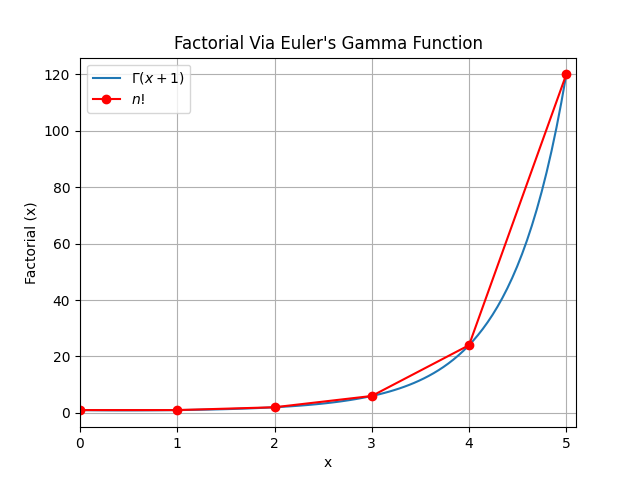

In [3]:
"""plot_euler_gamma.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np

if typing.TYPE_CHECKING:
    from typing import Callable

    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def factorial_recursive(n: int) -> int:
    if n == 0:
        return 1
    else:
        return int(n) * factorial_recursive(n - 1)


def f(x: float, s: NDArray[np.float_]) -> float:
    try:
        return np.power(x, s - 1) * np.exp(-x)
    except ZeroDivisionError:
        return 0


# fmt: off
def simpsons_rule(func: Callable[[float, NDArray[np.float_]], float],
                  s: NDArray[np.float_],
                  a: float, b: float, intervals: int) -> NDArray[np.float_]:
#fmt: on
    """Numerically estimate the integral of func() in [a,b] using Simpson's rule"""
    dx: float = (b - a) / intervals
    area: float = func(a, s) + func(b, s)
    for i in range(1, intervals):
        area += func(a + i * dx, s) * (2 * (i % 2 + 1))
    return np.asarray(dx / 3 * area, dtype=np.float_)


def euler_gamma(s: NDArray[np.float_]) -> NDArray[np.float_]:
    return simpsons_rule(f, s, 0, int(1e3), int(1e5))


def factorial_gamma(x: NDArray[np.float_]) -> NDArray[np.float_]:
    return np.round(euler_gamma(x + 1), 5)


def plot(ax: Axes, zoom: bool) -> None:
    xa: NDArray[np.float_] = np.linspace(0, 5, 100, dtype=np.float_)

    ax.plot(xa, factorial_gamma(xa), label=r"$\Gamma \left( x + 1 \right)$")

    n: list[int] = [factorial_recursive(i) for i in range(6)]

    ax.plot(range(len(n)), n, color="red", marker="o", label="$n!$")

    ax.set_title("Factorial Via Euler's Gamma Function")
    ax.set_xlabel("x")
    ax.set_ylabel("Factorial (x)")
    ax.grid()
    ax.legend(loc="best")

    ax.set_xlim(0, 5.1)

    if zoom:
        ax.set_xlim(0, 2.1)
        ax.set_ylim(0.5, 2.1)


def plot_euler_gamma(zoom: bool = False) -> None:
    plt.close("all")
    plt.figure(" ")
    plot(plt.axes(), zoom)
    plt.show()


plot_euler_gamma()


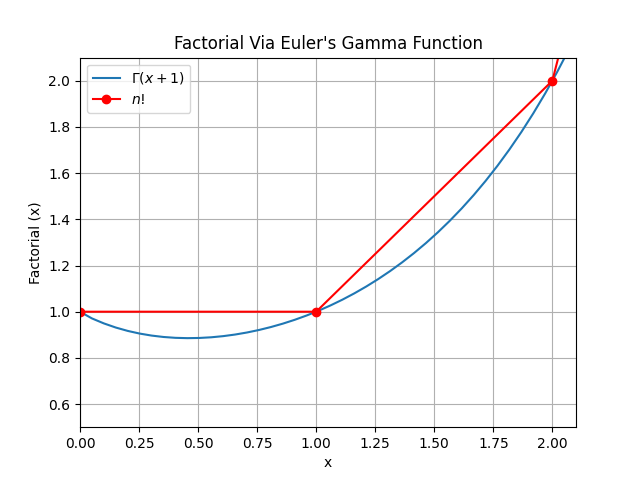

In [2]:
# Cell 2

plot_euler_gamma(zoom=True)
